# reddit.com/r/nba comments download and storage

* all posts with lebron james in title?

## which comments?

* all comments in post?
* all top level comments?
* all comments above a certain upvote threshold?
* first X top level comments or X comments above certain vote threshold
* controversial is good too (total votes) or upvotes?

In [119]:
import praw
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

## process to pull comments and concatenate into dataframe

In [126]:
subreddit = reddit.subreddit('nfl').top(limit=10)

In [128]:
for post in subreddit:
    print(post.title)

[Highlight] NO vs MIN - Diggs game-winning TD reception
New England Patriots are the Super Bowl LI Champions
[Highlight] Trey Burton pass to Nick Foles for the TD on 4th down
[Highlight] Mariota catches his own deflected pass for a TD
[OC]Which teams have fewer fans than their namesake? A study
Browns are the first NFL team to finish 0-16 since the 2008 Lions.
For the first time since December 2016 the Cleveland Browns have NOT lost the game! They TIE with the Steelers, 21-21
The Dallas Cowboys Have Been Eliminated From Playoff Contention
Stunner: Texans trade Brock Osweiler AND 2018 2nd-rd pick to CLEV for Browns to take Osweiler contract off Houston books, sources tell ESPN.
The Buffalo Bills have clinched a playoff berth for the first time since 1999.


In [155]:
nba_comments = set()

time_stamps = []
comment_scores = []

# add another loop outside here to do this by post day

count = 0 
while count < 3:
    for submission in reddit.subreddit('nba').top(limit=10):
        if 'lebron' in submission.title.lower() or 'lebron james' in submission.title.lower():
            print('HERE BE LEBRON')
            submission.comments.replace_more(limit=5)
            comments = submission.comments.list()[:3]
            for comment in comments:
    #             print(comment.body)
    #             print('::::::::::::::')
                nba_comments.add(comment.body)
                time_stamps.append(comment.created_utc)
                comment_scores.append(comment.score)
            count += 1

HERE BE LEBRON
HERE BE LEBRON
HERE BE LEBRON


In [157]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()

results = []

for c in nba_comments:
    nba_score = sia.polarity_scores(c)
    nba_score['comment_text'] = c
    results.append(nba_score)
    
pprint(results[:5], width=100)

[{'comment_text': 'Lebron to the Lakers breaking while ESPN is airing the Red Sox vs Yankees is '
                  'ESPNs absolute fucking nightmare.',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'comment_text': 'lebron finally realized the best person to pass to was himself',
  'compound': 0.6369,
  'neg': 0.0,
  'neu': 0.704,
  'pos': 0.296},
 {'comment_text': 'Lebron just pulled off an All Star Game move in the NBA Finals.',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'comment_text': "THIS AIN'T NBA JAM BABY ", 'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'comment_text': 'This is what men do! MEN STUFF! ',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [121]:
df = pd.DataFrame.from_records(results)

df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1

df2 = df[['comment', 'label']]
# df2.to_csv('reddit_nba_lebron_sa.csv', mode='a', encoding='utf-8', index=False)

print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("Negative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

print('\niValue counts:')
print(df.label.value_counts())
print('\nProportion of value counts:')
print(df.label.value_counts(normalize=True) * 100)

[{'compound': 0.0,
  'headline': 'MJ never tossed an oop to himself in an elimination game in the NBA finals ',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': "It's not about going to the Warriors. It's about *the implication* of going to the "
              'Warriors',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0, 'headline': 'UH OH ', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]
Positive headlines:

['First thought was Lebron bby what is u doing \n\nthen OH. MY. GOD \n',
 '**THE EASTERN CONFERENCE HAS BEEN ELIMINATED FROM CHAMPIONSHIP CONTENTION**',
 'lebron finally realized the best person to pass to was himself',
 '"And you set it up so you can get these teams back at any time huh?"\n'
 '\n'
 '"That\'s exactly right Kevin, you are really pickin up on this. i\'m proud of ya"\n'
 '\n'
 '"Ok there is no way that team is gonna come back to you after what you just put them through"\n'
 '\n'
 '"Oh i could absolutely get that team back any time i want,

AttributeError: module 'matplotlib.pyplot' has no attribute 'tite'

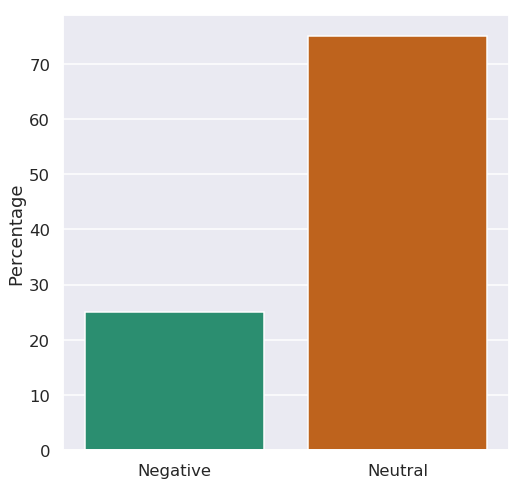

In [121]:
fig, ax = plt.subplots(figsize = (8,8))

counts = df.label.value_counts(normalize = True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.title('NBA Comments')

plt.show();

In [110]:
reddit = praw.Reddit('bot1', user_agent='bot1 user agent')

In [111]:
reddit.read_only = True

In [112]:
print(reddit.read_only)

True


In [113]:
subreddit = reddit.subreddit('nba')

In [114]:
print(subreddit.display_name)  # Output: redditdev
print(subreddit.title)         # Output: reddit Development
#print(subreddit.description)   # Output: A subreddit for discussion of ...

nba
NBA


In [ ]:
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments[:15]:
    print(top_level_comment.body)
    print('-----------')

In [115]:
for submission in subreddit.hot(limit=5):
    print('TITLE::::',submission.title)  # Output: the submission's title
    print('score::::',submission.score)  # Output: the submission's score
    print('ID::::',submission.id)     # Output: the submission's ID
    print('URL::::',submission.url)    # Output: the URL the submission points to
                             # or the submission's URL if it's a self post
    print('\n')

TITLE:::: r/NBA Game Threads Index + Daily Discussion (November 04, 2018)
score:::: 38
ID:::: 9u3yzn
URL:::: https://www.reddit.com/r/nba/comments/9u3yzn/rnba_game_threads_index_daily_discussion_november/


TITLE:::: Nikola Jokic on Wendell Carter Jr. , “ No Homo but he’s longer than you expect.”
score:::: 5269
ID:::: 9u5u9t
URL:::: https://www.reddit.com/r/nba/comments/9u5u9t/nikola_jokic_on_wendell_carter_jr_no_homo_but_hes/


TITLE:::: Giannis Antetokounmpo puts the "freak" in Greek Freak on this 1 handed hook dunk
score:::: 1498
ID:::: 9u7nek
URL:::: https://streamable.com/5bbgh


TITLE:::: Bucks fan names 27 different types of cheese in 30 seconds.
score:::: 1179
ID:::: 9u7aco
URL:::: https://streamable.com/k4b1a


TITLE:::: [Vardon] Things are even worse on the Cavaliers than they seem. Vets expect to be traded. Growing disillusionment with Collin Sexton. Mixed messages from management. Players backing Drew’s contract request.
score:::: 4166
ID:::: 9u3a98
URL:::: https://twitter.

In [56]:
# assume you have a Reddit instance bound to variable `reddit`
top_level_comments = list(submission.comments)
# all_comments = submission.comments.list()

In [58]:
top_level_comments[0].body

'5 years, 35 mill HMMMM'

In [59]:
for c in top_level_comments[:10]:
    pprint.pprint(c.score)

    pprint.pprint(c.body)
    print(':::::::::::::::')

243
'5 years, 35 mill HMMMM'
:::::::::::::::
160
('Brooks makes too much money for the owner to fire him with so many years '
 'left . More likely that they trade some players.')
:::::::::::::::
91
'The media just gunna keep asking until the answer becomes yes'
:::::::::::::::
64
'Dwight Howard please save these cats'
:::::::::::::::
99
('Please note that the owner let the coach who won the Stanley fucking cup '
 'walk this offseason but won’t fire Scott brooks \n'
 '\n'
 'I need to move to another media footprint I’m so tired of dc sports ')
:::::::::::::::
12
('so what? we need a front office change. this has become a taboo subject for '
 'the local and national media and it makes no fucking sense')
:::::::::::::::
19
'Would Wizards fans rather have Ty Lue or Scott Brooks?'
:::::::::::::::
15
'what the actual fuck'
:::::::::::::::
3
('[An inside look at '
 'Washington](https://i.kym-cdn.com/photos/images/newsfeed/000/962/640/658.png)')
:::::::::::::::
57
'Imagine paying John Wall 40 

In [42]:
pprint.pprint(vars(top_level_comments[0]))

{'_fetched': True,
 '_info_params': {},
 '_mod': None,
 '_reddit': <praw.reddit.Reddit object at 0x7efc67d8f668>,
 '_replies': <praw.models.comment_forest.CommentForest object at 0x7efc674da860>,
 '_submission': Submission(id='9tjm1c'),
 'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': Redditor(name='Mr_E_Nigma_Solver'),
 'author_flair_background_color': '',
 'author_flair_css_class': 'Knicks5',
 'author_flair_richtext': [],
 'author_flair_template_id': 'd66cc3a2-3feb-11e8-a1b1-0ea4bf1137fc',
 'author_flair_text': 'Knicks',
 'author_flair_text_color': 'dark',
 'author_flair_type': 'text',
 'author_fullname': 't2_hf0ao',
 'author_patreon_flair': False,
 'banned_at_utc': None,
 'banned_by': None,
 'body': "It's really fun to see the Kings doing good, and being good. ",
 'body_html': '<div class="md"><p>It&#39;s really fun to see the Kings doing '
              'good, and being good. </p>\n'
              '</div>',
 'can_gild': True,
 'can_mod_post': False,
 '

In [70]:
def add_up_range(n):
    result = 0
    for i in range(n+1):
        result+= i
    return result
add_up_range(4)

10

In [83]:
cat = list(range(5))
cat.append(3)
cat.index(3)

3

In [79]:
def first_and_last_add_up_range(n):
    n_range = list(range(n+1))
    result = 0
    while len(n_range) > 0:
        result += n_range[0]
        result += n_range[-1]
        n_range.del(n_r)
        n_range.del(-1)
    return result
first_and_last_add_up_range(4)

SyntaxError: invalid syntax (<ipython-input-79-6bca17dec0c9>, line 7)